퍼셉트론
  - 다수의 입력신호를 받아서 하나의 신호를 출력하는 시스템
  - 신호는 0과 1로 구성되어 있음

  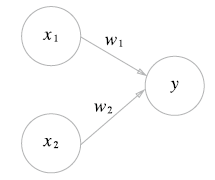

  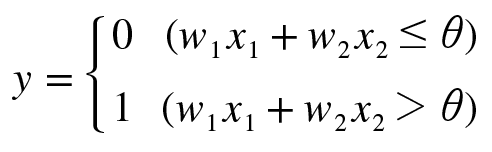

In [1]:
# 원을 뉴런
# w1, w2 는 가중치
# 세타는  임계값

AND 게이트
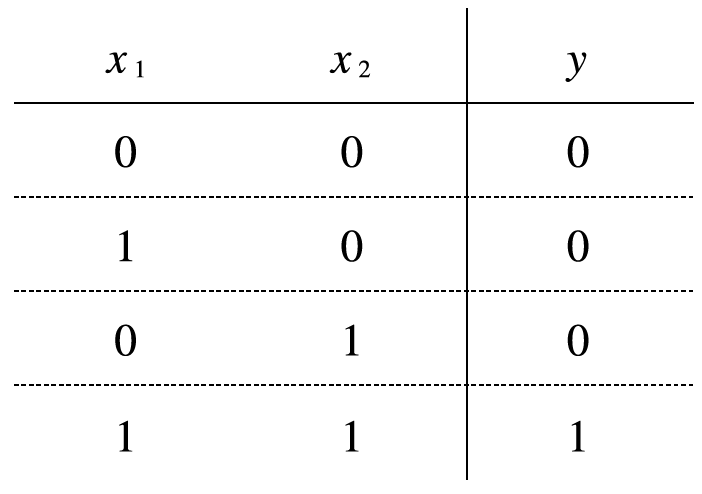

NAND 게이트
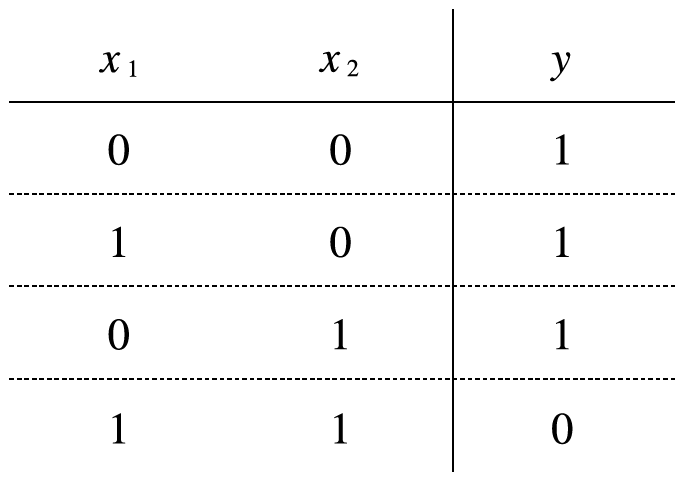

OR 게이트
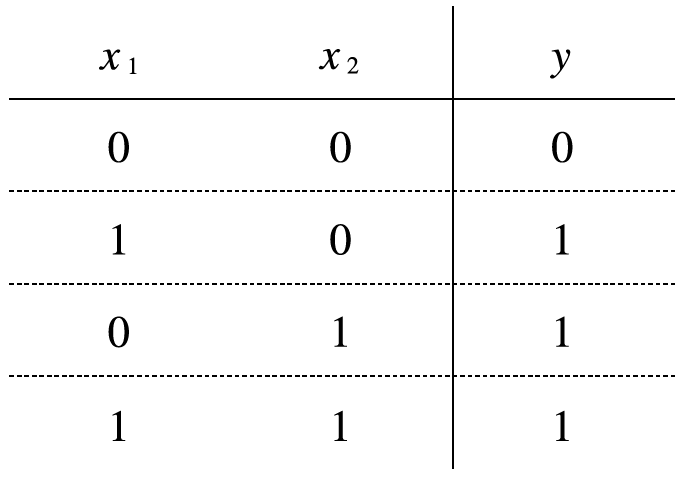

퍼셉트론 구현

In [2]:
def AND(x1, x2):
  w1,w2,theta = 0.5,0.5,0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  else:
    return 1

In [3]:
print(f'0 : 0 : {AND(0,0)}')
print(f'1 : 0 : {AND(1,0)}')
print(f'0 : 1 : {AND(0,1)}')
print(f'1 : 1 : {AND(1,1)}')

0 : 0 : 0
1 : 0 : 0
0 : 1 : 0
1 : 1 : 1


편향도입 : 모든 입력에 공통적으로 더해지는 상수
  - 크면 쉽게 뉴런이 활성화
  - 작으면(마이너스) 뉴런이 활성화 되기 어려움

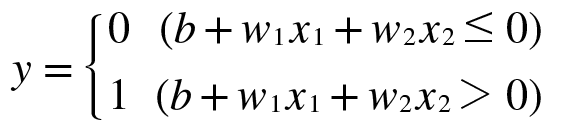

In [4]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7
print(w*x)
print(np.sum(w*x))
np.sum(w*x)+b

[0.  0.5]
0.5


-0.19999999999999996

In [5]:
def AND(x1, x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.7
  tmp = np.sum(x*w) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [6]:
print(f'0 : 0 : {AND(0,0)}')
print(f'1 : 0 : {AND(1,0)}')
print(f'0 : 1 : {AND(0,1)}')
print(f'1 : 1 : {AND(1,1)}')

0 : 0 : 0
1 : 0 : 0
0 : 1 : 0
1 : 1 : 1


In [7]:
def NAND(x1, x2):
  x = np.array([x1,x2])
  w = np.array([-0.5,-0.5])
  b = 0.7
  tmp = np.sum(x*w) + b
  if tmp <= 0:
    return 0
  else:
    return 1
print(f'0 : 0 : {NAND(0,0)}')
print(f'1 : 0 : {NAND(1,0)}')
print(f'0 : 1 : {NAND(0,1)}')
print(f'1 : 1 : {NAND(1,1)}')

0 : 0 : 1
1 : 0 : 1
0 : 1 : 1
1 : 1 : 0


XOR 게이트

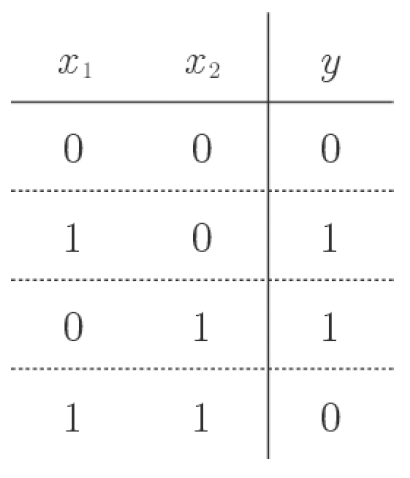

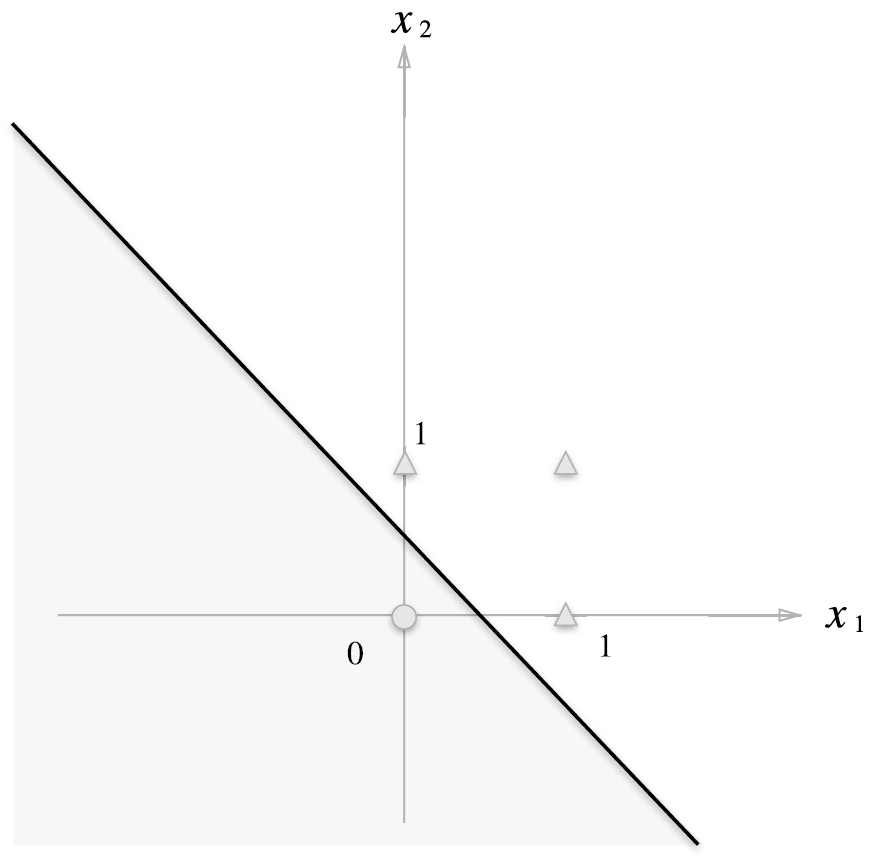

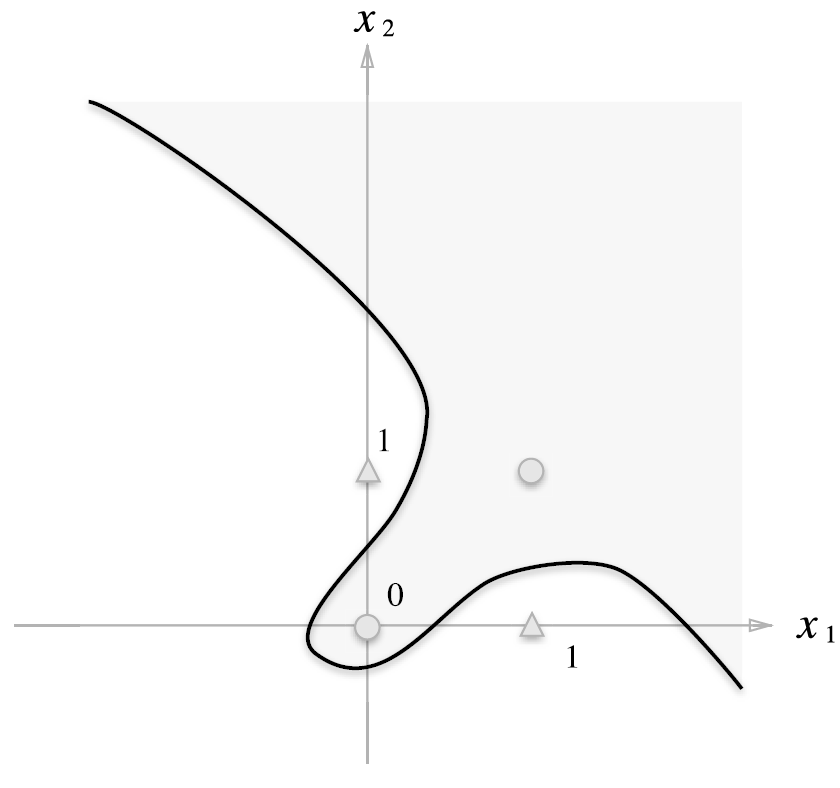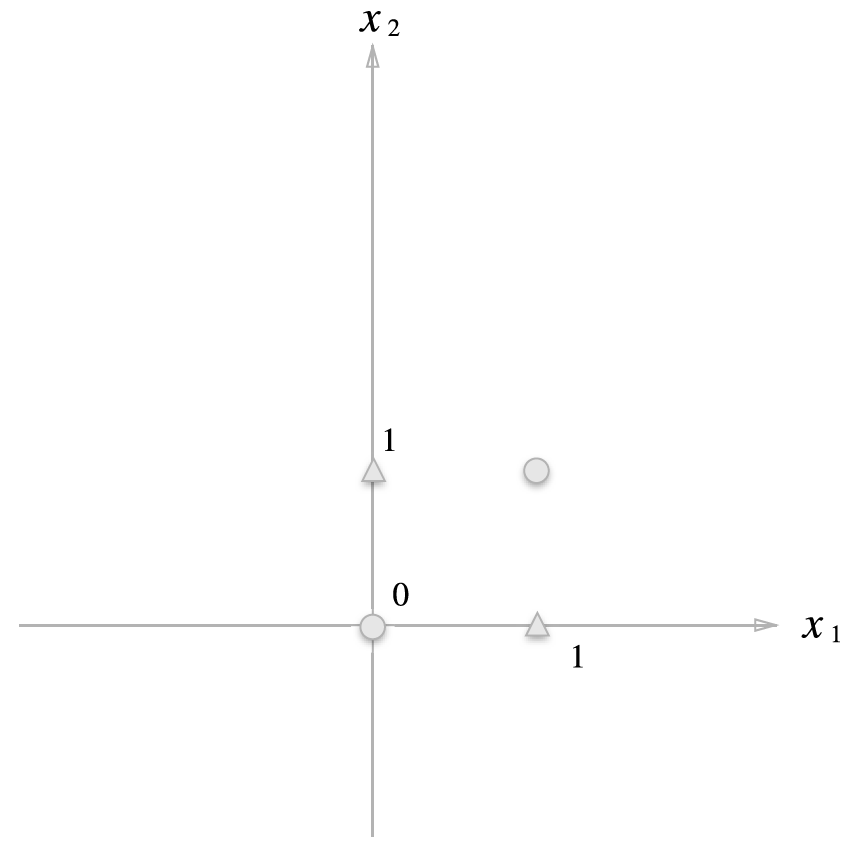

다층 퍼셉트론

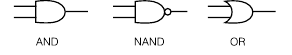

XOR 완성하기

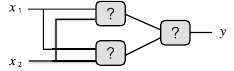

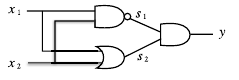

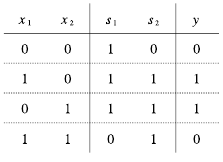

XOR 게이트 구현하기

In [8]:
# 실습

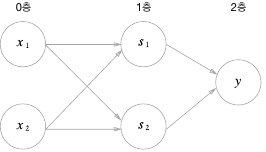

In [9]:
# 계단식 활성화 함수
def step_function(x):
  y = x > 0
  return y.astype(int)

In [10]:
step_function(np.array([-0.5,2]))

array([0, 1])

(-0.1, 1.1)

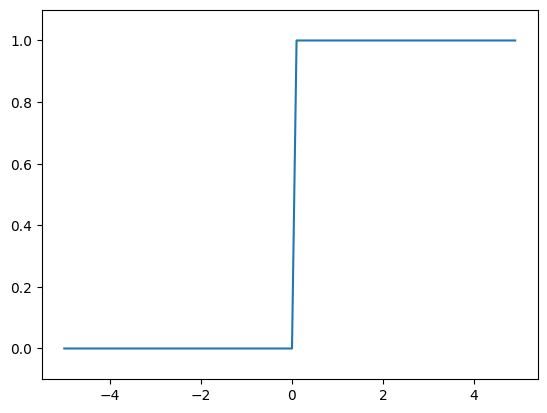

In [11]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.ylim(-0.1,1.1)

In [54]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

(-0.1, 1.1)

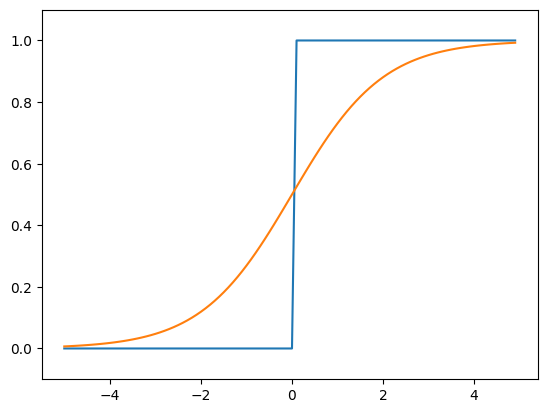

In [13]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
y2 = sigmoid(x)
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(x,y2)
plt.ylim(-0.1,1.1)

In [14]:
def relu(x):
  return np.maximum(0,x)

(-0.1, 1.1)

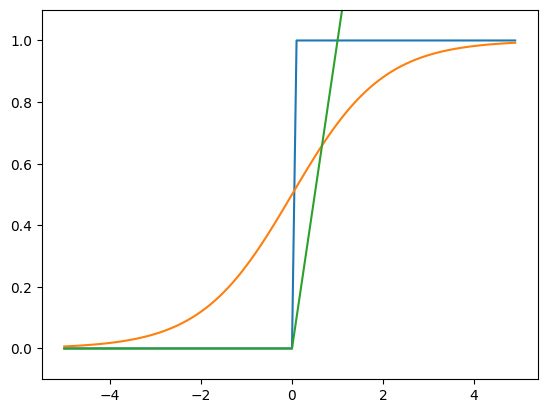

In [15]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
y2 = sigmoid(x)
y3 = relu(x)
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.ylim(-0.1,1.1)

In [16]:
x = np.arange(-5.0,5.0,0.1)
np.maximum(0,x)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1,
       0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [17]:
# 렐루함수의 특성상
# 미분을 적용하면 0보다 작으면 0
# 0보다 큰 값은 자기자신을 반환하므로 미분값은 1
def relu_derivative(x):
  return np.where(x > 0 ,1 ,0)

In [18]:
# 입력값
x = np.array([-2, -1, 0, 1, 2])
output = relu(x)
output

array([0, 0, 0, 1, 2])

In [19]:
# 미분 적용
gradient = relu_derivative(x)
gradient

array([0, 0, 0, 1, 1])

다차원 배열

In [23]:
import numpy as np
temp = np.array([1,2,3,4])
temp.shape
# 차수
np.ndim(temp)

1

In [26]:
# 2차원 배열
temp = np.array([[1,2],[3,4],[5,6]])
temp.shape, np.ndim(temp)

((3, 2), 2)

행렬의 곱

In [28]:
temp1 = np.array([[1,2],[3,4]])
temp2 = np.array([[5,6],[7,8]])
# temp1*temp2  # x
np.dot(temp1,temp2)


array([[19, 22],
       [43, 50]])

In [31]:
temp1 = np.array([[1,2],[3,4],[5,6]])
temp2 = np.array([2,3])
temp1.shape, temp2.shape

((3, 2), (2,))

In [32]:
np.dot(temp1,temp2)

array([ 8, 18, 28])

신경망에서 행렬 의 곱

In [33]:
x = np.array([1,2])
w = np.array([[1,3,5],[2,4,6]])
x.shape, w.shape

((2,), (2, 3))

In [34]:
y = np.dot(x,w)

array([ 5, 11, 17])

y = xw + b

In [36]:
x = np.array([1,2])
w = np.array([[1,3,5],[2,4,6]])
b = np.array([1,2,3])
y = np.dot(x,w) + b
print(y)
z1 = sigmoid(y)
print(z1)

[ 6 13 20]
[0.99752738 0.99999774 1.        ]


In [37]:
w2 = np.array([[1,4],[2,5],[3,6]])
b2 = np.array([1,2])
y2 = np.dot(z1,w2)+b2
print(y2)
z2 = sigmoid(y2)
print(z2)

[ 6.99752285 16.99009819]
[0.99908669 0.99999996]


In [38]:
# 입력값 그대로 출력하는 최종 출력함수 - 항등함수(identify function)
def identify_funtion(x):
  return x

In [40]:
w3 = np.array([[1,3],[2,4]])
b3 = np.array([1,2])
y3 = np.dot(z2,w3)+b3
print(y3)
y = identify_funtion(y3)
print(y)

[3.99908661 8.99725991]
[3.99908661 8.99725991]


신경망 구현하기

In [47]:
# 각신경망에서 사용된 각각의 가중치와 바이어스의 목록
class network():
  def __init__(self):
    self.netw = {}
    self.netw['w1'] = np.array([[1,3,5],[2,4,6]])
    self.netw['w2'] = np.array([[1,4],[2,5],[3,6]])
    self.netw['w3'] = np.array([[1,3],[2,4]])
    self.netw['b1'] = np.array([1,2,3])
    self.netw['b2'] = np.array([1,2])
    self.netw['b3'] = np.array([1,2])
  def sigmoid(self,x):
    return 1 / (1+np.exp(-x))
  def identify_funtion(self,x):
    return x
  def forward(self, x):
    z1 = np.dot(x,self.netw['w1']) + self.netw['b1']
    z1 = self.sigmoid(z1)
    z2 = np.dot(z1,self.netw['w2']) + self.netw['b2']
    z2 = self.sigmoid(z2)
    z3 = np.dot(z2,self.netw['w3']) + self.netw['b3']
    z3 = self.sigmoid(z3)
    y = self.identify_funtion(z3)
    return y

In [49]:
model = network()
x = np.array([1,2])
y = model.forward(x)
print(y)

[0.98199765 0.99987627]


출력층
  - 분류 : 소프트 맥스 함수

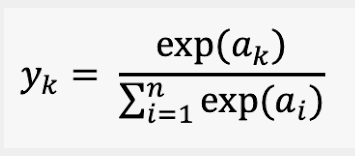

In [55]:
x = np.array([0.2,2,3.5])
# 지수함수
exp_1 = np.exp(x)
print(exp_1)
sum_exp_1 = np.sum(exp_1)
print(sum_exp_1)
y = exp_1 / sum_exp_1
print(y)
print(sigmoid(x))

[ 1.22140276  7.3890561  33.11545196]
41.72591081578313
[0.02927205 0.17708556 0.7936424 ]
[0.549834   0.88079708 0.97068777]


In [56]:
def softmax(x):
  exp_1 = np.exp(x)
  sum_exp_1 = np.sum(exp_1)
  y = exp_1 / sum_exp_1
  return y

In [60]:
temp = softmax([0.98199765, 0.99987627])
temp

array([0.49553046, 0.50446954])

손글씨 인식

forward : 순전파
  - 훈련데이터를 사용해서 가중치 매개변수를 학습
  - 최종적으로는 매개변수를 이용해서 입력데이터를 분류

In [61]:
from tensorflow import keras

In [69]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [70]:
x_train, x_test = x_train.reshape(-1,28*28), x_test.reshape(-1,28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [71]:
from PIL import Image

In [76]:
def show_image(x):
  x_img = Image.fromarray(np.int8(x))
  x_img.show()

In [79]:
temp = x_train[100].reshape(28,28)
show_image(temp)

입력데이터 크기
  - 784
  - 입력뉴런이 784
  - 최종 출력을 10

In [105]:
from tensorflow import keras
import pickle
def sigmoid(x):
  return 1 / (1+np.exp(-x))

def softmax(x):
  exp_1 = np.exp(x)
  sum_exp_1 = np.sum(exp_1)
  y = exp_1 / sum_exp_1
  return y

class network_model():
  def load_data(self):
    (x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.reshape(-1, x_train.shape[1]*x_train.shape[2]) / 255.0
    x_test = x_test.reshape(-1, x_test.shape[1]*x_test.shape[2]) / 255.0
    y_train = y_train
    y_test = y_test
    return x_train,y_train,x_test,y_test
  def __init__(self):
    with open('/content/sample_weight.pkl' ,'rb') as f:
      network = pickle.load(f)
    self.netw = {}
    self.netw['w1'] = network['W1']
    self.netw['w2'] = network['W2']
    self.netw['w3'] = network['W3']
    self.netw['b1'] = network['b1']
    self.netw['b2'] = network['b2']
    self.netw['b3'] = network['b3']
  def predict(self,x):
    z1 = np.dot(x,self.netw['w1']) + self.netw['b1']
    z1 = sigmoid(z1)
    z2 = np.dot(z1,self.netw['w2']) + self.netw['b2']
    z2 = sigmoid(z2)
    z3 = np.dot(z2,self.netw['w3']) + self.netw['b3']
    z3 = sigmoid(z3)
    y = softmax(z3)
    return y


In [106]:
model = network_model()
x_train,y_train,x_test,y_test = model.load_data()

In [107]:
import tqdm
acc_count = 0
for i in tqdm.tqdm(range(len(x_train))):
  y = model.predict(x_train[i])
  if np.argmax(y) == y_train[i]:
    acc_count += 1
print(f"accuracy = {acc_count / len(x_train)}")

100%|██████████| 60000/60000 [00:09<00:00, 6273.48it/s]

accuracy = 0.9357666666666666


In [108]:
acc_count = 0
for i in tqdm.tqdm(range(len(x_test))):
  y = model.predict(x_test[i])
  if np.argmax(y) == y_test[i]:
    acc_count += 1
print(f"accuracy = {acc_count / len(x_test)}")

100%|██████████| 10000/10000 [00:01<00:00, 7713.79it/s]

accuracy = 0.9352


In [111]:
from tensorflow import keras
input = keras.layers.Dense(50,activation = 'sigmoid', input_shape=(784,))
dense1 = keras.layers.Dense(100,activation = 'sigmoid')
output = keras.layers.Dense(10,activation = 'softmax')
keras_model = keras.Sequential([input,dense1,output])
keras_model.compile(loss = keras.losses.sparse_categorical_crossentropy, metrics='accuracy')
keras_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5452 - accuracy: 0.8594
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2198 - accuracy: 0.9348
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1680 - accuracy: 0.9500
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1403 - accuracy: 0.9582
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1211 - accuracy: 0.9645
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1078 - accuracy: 0.9682
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0971 - accuracy: 0.9717
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0874 - accuracy: 0.9744
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0810 - accuracy: 0.9765
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.073

In [112]:
keras_model.evaluate(x_train,y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0671 - accuracy: 0.9808


[0.0670846626162529, 0.9807666540145874]

In [113]:
keras_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1009 - accuracy: 0.9700


[0.10085222870111465, 0.9700000286102295]

In [114]:
keras_model.save('keras_model.h5')

In [117]:
load_model = keras.models.load_model('/content/keras_model.h5')

In [118]:
load_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1009 - accuracy: 0.9700


[0.10085222870111465, 0.9700000286102295]

In [119]:
keras_model.save_weights('weights_saved.h5')

In [123]:
from tensorflow import keras
input = keras.layers.Dense(50,activation = 'sigmoid', input_shape=(784,))
dense1 = keras.layers.Dense(100,activation = 'sigmoid')
output = keras.layers.Dense(10,activation = 'softmax')
weight_model = keras.Sequential([input,dense1,output])
weight_model.load_weights('weights_saved.h5')
weight_model.compile(loss = keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [125]:
weight_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1009 - accuracy: 0.9700


[0.10085222870111465, 0.9700000286102295]